# LAB 11: PART 2-LOGISTIC REGRESSION

## Q.2) Logistic regression. Using the data provided (Logistic_regression_ls.csv), plot the decision boundary (linear) using Optimization of the sigmoid function.



In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# cost function
def cost_function(w, X, y):
    m = len(y)
    h = sigmoid(np.dot(X, w))
    cost = (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    gradient = (1 / m) * np.dot(X.T, (h - y))
    return cost, gradient

# Implement gradient descent
def gradient_descent(X, y, w, learning_rate, iterations):
    cost_history = []
    for _ in range(iterations):
        cost, gradient = cost_function(w, X, y)
        w -= learning_rate * gradient
        cost_history.append(cost)
    return w, cost_history


In [41]:
#  Load data and preprocess
data = pd.read_csv('Logistic_regression_ls.csv')
X = data[['x1', 'x2']].values
X = np.hstack((np.ones((X.shape[0], 1)), X))  # Add bias term
y = data['label'].values.reshape(-1, 1)

In [42]:
# Initialize w
w0 = np.zeros((X.shape[1], 1))

# Define hyperparameters
learning_rate = 0.01
iterations = 10000

# Run gradient descent
w, cost_history = gradient_descent(X, y, w0, learning_rate, iterations)

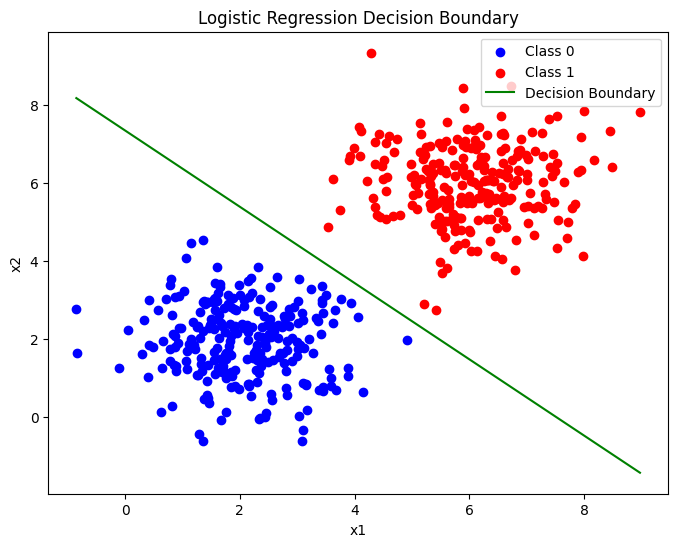

In [39]:
# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.scatter(data[data['label'] == 0]['x1'], data[data['label'] == 0]['x2'], color='blue', label='Class 0')
plt.scatter(data[data['label'] == 1]['x1'], data[data['label'] == 1]['x2'], color='red', label='Class 1')

x1_boundary = np.array([np.min(X[:,1]), np.max(X[:,1])])
x2_boundary = -(w[0] + w[1] * x1_boundary) / w[2]

plt.plot(x1_boundary, x2_boundary, color='green', label='Decision Boundary')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Logistic Regression Decision Boundary')
plt.legend()
plt.show()